# Mergers & Acquisition - Stock Price Prediction
**Data Gathering and Manipulation Techniques for Analysis**<br>
by Carloz Gil

*The Notebook contains links that don't operate on Github. It is recommended to view the project below:*<br>
https://nbviewer.org/github/clozgil/Mergers-Acquisition-Stock-Price-Prediction/blob/main/Mergers%20%26%20Acquisition%20-%20Stock%20Price%20Prediction.ipynb

## Table of Contents <a id="back_to_top"></a>
- [Introduction](#Introduction)
    - [The Process](#process)
    - [Data Sources](#sources)
- [Data Gathering & Wrangling](#g&w)
    - [Acquisition Data](#acq)
    - [Ratio Data](#ratio)
    - [Stock Data](#stock)
- [Concat and Merging the Dataframes](#c&m)
    - [Concatenate](#concat)
    - [Merge](#merge)
- [Data Cleaning](#clean)
    - [Handling Missing Values](#missing)
    - [Additional Data Cleaning](#add_clean)
- [Analysis](#analysis)
    - [Creating and Training](#create&train)
    - [Feature Selection and Scaling](#selection&scaling)
    - [Multiple Linear Regression](#regression)
    - [Statistical Commentary](#stats)
- [Further Action](#action)

<a id="Introduction"></a>
# Introduction

This project looks at the mergers and acquisitions of 30 publicly traded companies and attempts to determine the stock price at closing. M&As are incredibly difficult to assess, and while the company's instrinsic value and fundamentals play a significant role in predicting whether a merger will be "successful", public sentiment from Wall Street investors is another commonly referenced topic. 

Brainstorming for this project prompted two notable observations; data on M&As are often incomplete and highly inconsistent given the confidentiality behind these deals, and determining an appropriate dependent variable y for analysis presents a significant challenge (would most likely require an additional project on its own). The success of a merger could be measured various ways, but often times the unpredictability of management makes all the more challenging. Culture, reorganization, and leadership shake-up are all attributes that play an important role in the success of an M&A but are difficult to quantify. 

Although I do build and run a model in this proejct, the complexity around this subject urged me to focus primarily on data gathering and manipulation. Since one would most likely need to compose a dataframe with the attributes necessary to run an a useful analysis on Mergers and Acquisition, I believe this is a valuable first step.

For a more balanced notebook between EDA, data manipulation, and models, I have a project that focuses on COVID19's impact on Post-Secondary Education below titled **COVID19 Effects on Post-Secondary Education**

https://nbviewer.org/github/clozgil/COVID19-Effects-on-Post-Secondary-Education/blob/main/COVID-19%20Effects%20on%20Post-Secondary%20Education.ipynb

<a id="process"></a>
## The Process

My objective was to build a dataframe with useful attribtues from scratch. I found that three reports per company would have sufficient information to get started.
- Acquistion data (any and all information on the company's M&A)
- Financial ratios (data to determine the company's fundamentals)
- Stock information (data to gain insight into Wall Street sentiment)

Since downloading, importanting, and cleaning each one of those files for each of the 30 companies would be cumbersome, I looped on all the data files using the `OS` module, simulteanously cleaning and merging each one of the files.

However, for the purpose of this presentation, I will feature each one of my data cleaning techniques for one company - **Apple**.

<a id="sources"></a>
## Data Sources

**For reference only. All necessary data for this project can be found in the `data` dictionary**

Acquisition data: https://www.capitaliq.com/CIQDotNet/my/dashboard.aspx
*

Financial ratios:
https://www-mergentonline-com.pitt.idm.oclc.org/companyfinancials.php?pagetype=ratios&compnumber=46247&period=Quarters&range=50&Submit=Refresh&csrf_token_mol=3680683535
*

Stock info:
https://www-mergentonline-com.pitt.idm.oclc.org/equitypricing.php?pagetype=report&compnumber=46247
*

(*) = Account required. University of Pittsburgh account used for access

[Back to the top](#back_to_top)

---

<a id="g&w"></a>
# Data Gathering & Wrangling

- Acquisition Data
- Ratio Data
- Stock Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = None
pd.options.display.max_rows = None
plt.rc('figure', figsize = (15,10))
%matplotlib inline

<a id="acq"></a>
## Acquisition Data

We begin by loading the acquisition data for the example company and renaming the "size($mm)" attribute to "price" (which will in turn become our dependent variable `y`), and the "closing date" to "date".

In [2]:
acq = pd.read_excel(os.getcwd() + '/data/AAPL_acq.xls', header=12)
acq.head(3)

,Transaction ID,Announced Date,Closed Date,Transaction Type,Role,Target,Buyer/Investors,Sellers,Rounds,Round Type,Pre-Money Valuation ($mm),Post-Money Valuation ($mm),Size ($mm),Aggregate Amount Raised ($mm)†
0,IQTR1679674155,2021-08-30,2021-08-30 00:00:00,Merger/Acquisition,Buyer,Primephonic B.V.,Apple Inc. (NasdaqGS:AAPL),NaN,-,-,-,-,-,-
1,IQTR709874507,2021-03-31,2021-03-31 00:00:00,Private Placement,Buyer,UnitedMasters LLC,Alphabet Inc. (NasdaqGS:GOOG.L); Andreessen Ho...,NaN,2,Series B,-,-,50,120
2,IQTR708449548,2021-01-01,2021-01-01 00:00:00,Merger/Acquisition,Buyer,Vilynx Spain SL,Apple Inc. (NasdaqGS:AAPL),"Caixa Capital Risc, SGEIC, S.A.; Kibo Ventures...",-,-,-,-,50,-


In [3]:
acq.rename(columns = {'Size ($mm)':'price'}, inplace = True)

In [4]:
acq.rename(columns = {'Closed Date':'date'}, inplace = True)

### Missing Values in Acquisition df

<AxesSubplot:>

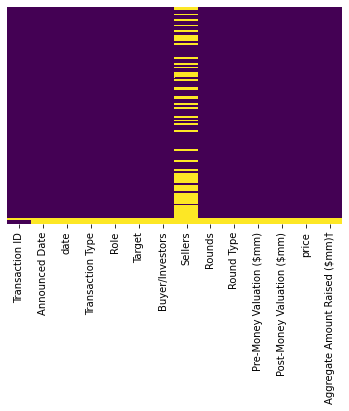

In [5]:
sns.heatmap(acq.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

**Establishing Null Values**

While the visual above does not show an abundance of missing values, by glancing at the actual dataframe above we are able to identify inputs that should be categorized as *Null*. We will establish null values in order to better determine how much data is actually missing

<AxesSubplot:>

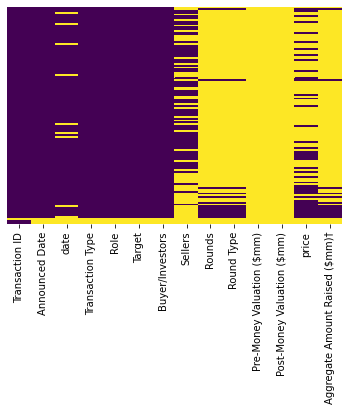

In [6]:
for col in acq.columns:
    if acq[col].dtype == 'O': #since we cannot replace datetime64, we'll make sure the column is an object
        acq[col].replace({'-':None}, inplace = True)
        

#A new visualization truly depicting how incomplete this dataset is
sns.heatmap(acq.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

While there is a lot of data cleaning to do, we'll reserve most of the procedures for later. However, to simplify the process later on in the project, we will automatically remove any rows where there isn't a date or a price since those attributes will be key to our analysis

In [7]:
acq.shape

(119, 14)

In [8]:
acq.dropna(subset = ['price', 'date'], inplace = True)

In [9]:
acq.shape

(41, 14)

### Date and Quarters

**Date** <br>
Note below that "date" (formerly "closing date") is not the appropriate datatype. This variable is of great importance, so we'll make it the approprite type and put it in a different format.

In [10]:
acq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1 to 114
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Transaction ID                  41 non-null     object        
 1   Announced Date                  41 non-null     datetime64[ns]
 2   date                            41 non-null     object        
 3   Transaction Type                41 non-null     object        
 4   Role                            41 non-null     object        
 5   Target                          41 non-null     object        
 6   Buyer/Investors                 41 non-null     object        
 7   Sellers                         24 non-null     object        
 8   Rounds                          11 non-null     float64       
 9   Round Type                      11 non-null     object        
 10  Pre-Money Valuation ($mm)       0 non-null      float64       
 11  Post-Mo

In [11]:
acq['date'] = pd.to_datetime(acq['date'], errors='coerce')
acq['date'] = acq['date'].dt.strftime('%m/%d/%Y')

In [12]:
acq.head(3)

,Transaction ID,Announced Date,date,Transaction Type,Role,Target,Buyer/Investors,Sellers,Rounds,Round Type,Pre-Money Valuation ($mm),Post-Money Valuation ($mm),price,Aggregate Amount Raised ($mm)†
1,IQTR709874507,2021-03-31,03/31/2021,Private Placement,Buyer,UnitedMasters LLC,Alphabet Inc. (NasdaqGS:GOOG.L); Andreessen Ho...,NaN,2.0,Series B,NaN,NaN,50.0,120.0
2,IQTR708449548,2021-01-01,01/01/2021,Merger/Acquisition,Buyer,Vilynx Spain SL,Apple Inc. (NasdaqGS:AAPL),"Caixa Capital Risc, SGEIC, S.A.; Kibo Ventures...",NaN,None,NaN,NaN,50.0,NaN
5,IQTR681815000,2020-08-03,08/03/2020,Merger/Acquisition,Buyer,Mobeewave Inc.,Apple Inc. (NasdaqGS:AAPL),Forestay Capital SA; Samsung Venture Investmen...,NaN,None,NaN,NaN,100.0,NaN


**Quarters**<br>
In preparation for merging all the datasets together, it is important to note the discrepency in dates. For example, the acquisition dataset has the actual date the M&A closed, but a company's ratios are reported and calculated every quarter.

To facilitate merging, we'll first isolate the month, date, and year; then, we'll create and apply a function to assign the appropriate quarter in which the merger would have been reflected in the company's financials (e.g., if a company closed an acqusition on January 1st, it will get assigned March 31st since that when the company will have reported it).

In [13]:
#isolate each aspect of the date in order to caluclate the quarter
acq['month'] = acq.date.apply(lambda x : x.split('/')[0])
acq['day'] = acq.date.apply(lambda x : x.split('/')[1])
acq['year'] = acq.date.apply(lambda x : x.split('/')[-1])
acq['month_day'] = acq.date.apply(lambda x : x.split('/')[0] + '/' + x.split('/')[1])

In [14]:
def quarters(x):
    '''
    The function takes in a month and date and assigned an appropriate quarter
    '''
    if x not in ['12/31', '09/30', '06/30','03/31']:
        if x < '12/31' and x >= '09/30':
            return '12/31'
        elif x < '09/30' and x >= '06/30':
            return '09/30'
        elif x < '06/30' and x>= '03/31':
            return '06/30'
        else:
            return '03/31'
    else:
        return x

In [15]:
# We'll create an attribute for the quarter and merge it with the appropriate date
acq['quarters'] = acq.month_day.apply(quarters)
acq['quarters'] = acq.quarters + '/' + acq.year

**Company**

Finally, since we'll be looping the above procedure over # companies, we'll include a column for the company name

In [16]:
acq['company'] = 'AAPL'

In [17]:
acq.head(3)

,Transaction ID,Announced Date,date,Transaction Type,Role,Target,Buyer/Investors,Sellers,Rounds,Round Type,Pre-Money Valuation ($mm),Post-Money Valuation ($mm),price,Aggregate Amount Raised ($mm)†,month,day,year,month_day,quarters,company
1,IQTR709874507,2021-03-31,03/31/2021,Private Placement,Buyer,UnitedMasters LLC,Alphabet Inc. (NasdaqGS:GOOG.L); Andreessen Ho...,NaN,2.0,Series B,NaN,NaN,50.0,120.0,03,31,2021,03/31,03/31/2021,AAPL
2,IQTR708449548,2021-01-01,01/01/2021,Merger/Acquisition,Buyer,Vilynx Spain SL,Apple Inc. (NasdaqGS:AAPL),"Caixa Capital Risc, SGEIC, S.A.; Kibo Ventures...",NaN,None,NaN,NaN,50.0,NaN,01,01,2021,01/01,03/31/2021,AAPL
5,IQTR681815000,2020-08-03,08/03/2020,Merger/Acquisition,Buyer,Mobeewave Inc.,Apple Inc. (NasdaqGS:AAPL),Forestay Capital SA; Samsung Venture Investmen...,NaN,None,NaN,NaN,100.0,NaN,08,03,2020,08/03,09/30/2020,AAPL


[Back to the top](#back_to_top)

---

<a id="ratio"></a>
## Ratio Data

Load a company's ratio data.

In [18]:
ratios = pd.read_excel(os.getcwd() + '/data/AAPL_ratios.xlsx', header = 9)
ratios.head(5)

,Profitability Ratios,09/25/2021,Unnamed: 2,06/26/2021,Unnamed: 4,03/27/2021,Unnamed: 6,12/26/2020,Unnamed: 8,09/26/2020,Unnamed: 10,06/27/2020,Unnamed: 12,03/28/2020,Unnamed: 14,12/28/2019,Unnamed: 16,09/28/2019,Unnamed: 18,06/29/2019,Unnamed: 20,03/30/2019,Unnamed: 22,12/29/2018,Unnamed: 24,09/29/2018,Unnamed: 26,06/30/2018,Unnamed: 28,03/31/2018,Unnamed: 30,12/30/2017,Unnamed: 32,09/30/2017,Unnamed: 34,07/01/2017,Unnamed: 36,04/01/2017,Unnamed: 38,12/31/2016,Unnamed: 40,09/24/2016,Unnamed: 42,06/25/2016,Unnamed: 44,03/26/2016,Unnamed: 46,12/26/2015,Unnamed: 48,09/26/2015,Unnamed: 50,06/27/2015,Unnamed: 52,03/28/2015,Unnamed: 54,12/27/2014,Unnamed: 56,09/27/2014,Unnamed: 58,06/28/2014,Unnamed: 60,03/29/2014,Unnamed: 62,12/28/2013,Unnamed: 64,09/28/2013,Unnamed: 66,06/29/2013,Unnamed: 68,03/30/2013,Unnamed: 70,12/29/2012,Unnamed: 72,09/29/2012,Unnamed: 74,06/30/2012,Unnamed: 76,03/31/2012,Unnamed: 78,12/31/2011,Unnamed: 80,09/24/2011,Unnamed: 82,06/25/2011,Unnamed: 84,03/26/2011,Unnamed: 86,12/25/2010,Unnamed: 88,09/25/2010,Unnamed: 90,06/26/2010,Unnamed: 92,03/27/2010,Unnamed: 94,12/26/2009,Unnamed: 96,09/26/2009,Unnamed: 98,06/27/2009,Unnamed: 100,03/28/2009,Unnamed: 102,12/27/2008,Unnamed: 104,09/27/2008,Unnamed: 106,06/28/2008,Unnamed: 108,03/29/2008,Unnamed: 110,12/29/2007,Unnamed: 112,09/29/2007,Unnamed: 114,06/30/2007,Unnamed: 116,03/31/2007,Unnamed: 118,12/30/2006,Unnamed: 120,09/30/2006,Unnamed: 122,07/01/2006,Unnamed: 124,04/01/2006,Unnamed: 126,12/31/2005,Unnamed: 128,09/24/2005,Unnamed: 130,06/25/2005,Unnamed: 132,03/26/2005,Unnamed: 134,12/25/2004,Unnamed: 136,09/25/2004,Unnamed: 138,06/26/2004,Unnamed: 140,03/27/2004,Unnamed: 142,12/27/2003,Unnamed: 144,09/27/2003,Unnamed: 146,06/28/2003,Unnamed: 148,03/29/2003,Unnamed: 150,12/28/2002,Unnamed: 152,09/28/2002,Unnamed: 154,06/29/2002,Unnamed: 156,03/30/2002,Unnamed: 158,12/29/2001,Unnamed: 160,09/29/2001,Unnamed: 162,06/30/2001,Unnamed: 164,03/31/2001,Unnamed: 166,12/30/2000,Unnamed: 168,09/30/2000,Unnamed: 170,07/01/2000,Unnamed: 172,04/01/2000,Unnamed: 174,01/01/2000,Unnamed: 176,09/25/1999,Unnamed: 178,06/26/1999,Unnamed: 180,03/27/1999,Unnamed: 182,12/26/1998,Unnamed: 184,09/25/1998,Unnamed: 186,06/26/1998,Unnamed: 188,03/27/1998,Unnamed: 190,12/26/1997,Unnamed: 192,09/26/1997,Unnamed: 194,06/27/1997,Unnamed: 196,03/28/1997,Unnamed: 198,12/27/1996,Unnamed: 200,09/27/1996,Unnamed: 202,06/28/1996,Unnamed: 204,03/29/1996,Unnamed: 206,12/29/1995,Unnamed: 208,09/29/1995,Unnamed: 210,06/30/1995,Unnamed: 212,03/31/1995,Unnamed: 214,12/31/1994,Unnamed: 216,09/30/1994,Unnamed: 218,07/01/1994,Unnamed: 220,04/01/1994,Unnamed: 222,12/31/1993,Unnamed: 224,09/24/1993,Unnamed: 226,06/25/1993,Unnamed: 228,03/26/1993,Unnamed: 230,12/25/1992,Unnamed: 232,09/25/1992,Unnamed: 234,06/26/1992,Unnamed: 236,03/27/1992,Unnamed: 238,12/27/1991,Unnamed: 240,06/30/1991,Unnamed: 242,03/29/1991,Unnamed: 244,Unnamed: 245
0,ROA % (Net),24.21,NaN,26.15,NaN,27.42,NaN,34.03,NaN,15.85,NaN,14.15,NaN,13.65,NaN,26.27,NaN,16.62,NaN,12.13,NaN,12.96,NaN,21.66,NaN,15.85,NaN,12.89,NaN,14.32,NaN,20.58,NaN,11.93,NaN,10.29,NaN,13.29,NaN,20.41,NaN,11.53,NaN,10.24,NaN,14.09,NaN,25.23,NaN,15.83,NaN,16.03,NaN,20.81,NaN,29.28,NaN,14.95,NaN,14.5,NaN,19.02,NaN,24.26,NaN,14.81,NaN,14.03,NaN,19.6,NaN,28.19,NaN,19.46,NaN,22.56,NaN,32.19,NaN,38.15,NaN,23.81,NaN,29.07,NaN,26.44,NaN,29.74,NaN,24.7,NaN,21.43,NaN,22.22,NaN,25.14,NaN,13.1,NaN,10.79,NaN,11.24,NaN,15.63,NaN,12.78,NaN,13.83,NaN,13.85,NaN,22.9,NaN,15.43,NaN,16.26,NaN,16.18,NaN,21.97,NaN,13.45,NaN,13.05,NaN,11.71,NaN,16.36,NaN,15.65,NaN,12.46,NaN,11.95,NaN,13.59,NaN,5.57,NaN,3.51,NaN,2.69,NaN,3.67,NaN,2.66,NaN,1.19,NaN,0.89,NaN,-0.51,NaN,-2.87,NaN,2.04,NaN,2.59,NaN,2.51,NaN,4.38,NaN,4.01,NaN,2.85,NaN,-12.23,NaN,9.93,NaN,11.51,NaN,12.81,NaN,10.69,NaN,8.75,NaN,16.36,NaN,11.37,NaN,13.58,NaN,10.21,NaN,10.12,NaN,5.45,NaN,4.51,NaN,-15.06,NaN,-5.09,NaN,-58.2,NaN,-9.05,NaN,1.87,NaN,-2.43,NaN,-50.36,NaN,-4.33,NaN,3.9,NaN,6.79,NaN,5.11,NaN,13.77,NaN,8.82,NaN,10.64,NaN,1

### Wrangling

The dataset has empty columns, the attributes as rows, and a bunch of null values. With this being a drastically different dataset from acquisition, we'll perform some quick wranling techniques

In [19]:
#Remove all empty columns (in this case, the columns are not recognized as NaN)
for i in ratios.columns:
    if 'Unnamed' in i:
        ratios.drop(i, axis = 1, inplace = True)
        
#Make the first column the list of attributes
ratios = ratios.transpose()

#Make the first row the name of the columns
ratios.columns = ratios.iloc[0]

#reset the index to drop duplicate row
ratios.reset_index(inplace = True)

#drop duplicate row (first row)
ratios.drop([0], inplace = True)

#rename assign index column as date
ratios.rename(columns={'index':'date'}, inplace=True)

#remove unnecessary NaN columns
ratios.dropna(axis = 1, thresh = 7, inplace = True)

Even though a company's financial ratios are recorded each quarter. Not all of the companies' quarters line up. To maintain consistency, we'll apply the same `quarter` function from above

In [20]:
ratios['month_day'] = ratios.date.apply(lambda x : x.split('/')[0] + '/' + x.split('/')[1])
ratios['quarters'] = ratios.month_day.apply(quarters)
ratios['quarters'] = ratios.quarters + '/' + ratios.date.apply(lambda x : x.split('/')[-1])

**Company**

Finally, since we'll be looping the above procedure over # companies, we'll include a column for the company name

In [21]:
ratios['ratios_company'] = 'AAPL'
ratios.head(3)

Profitability Ratios,date,ROA % (Net),ROE % (Net),ROI % (Operating),EBITDA Margin %,Calculated Tax Rate %,Liquidity Ratios,Quick Ratio,Current Ratio,Net Current Assets % TA,Debt Management,LT Debt to Equity,Total Debt to Equity,Interest Coverage,Asset Management,Total Asset Turnover,Receivables Turnover,Inventory Turnover,Accounts Payable Turnover,Accrued Expenses Turnover,Property Plant & Equip Turnover,Cash & Equivalents Turnover,Per Share,Cash Flow per Share,Book Value per Share,month_day,quarters,ratios_company
1,09/25/2021,24.21,129.43,51.04,31.49,11.6,09/25/2021,-,1.07,2.67,09/25/2021,1.73,1.98,1829.69,09/25/2021,0.98,7.83,32.88,7.03,-,8.57,9.69,09/25/2021,4.91,3.84,09/25,09/30/2021,AAPL
2,06/26/2021,26.15,130.7,51.35,33.34,10.77,06/26/2021,0.89,1.06,2.02,06/26/2021,1.65,1.89,-,06/26/2021,0.98,9.76,35.63,8.11,-,8.55,9.01,06/26/2021,5.09,3.88,06/26,06/30/2021,AAPL
3,03/27/2021,27.42,140,59.78,34.34,15.64,03/27/2021,0.97,1.14,4.47,03/27/2021,1.57,1.76,-,03/27/2021,1.04,7.84,40.54,6.91,-,9.49,9.65,03/27/2021,5.74,4.15,03/27,03/31/2021,AAPL


[Back to the top](#back_to_top)

<a id="stock"></a>
## Stock Data

Load a company's ratio data.

In [22]:
stocks = pd.read_excel(os.getcwd() + '/data/AAPL_stocks.xlsx', header = 11)
stocks.head(3)

,Date,Open,High,Low,Close,Volume,Price Move (%)
0,11/08/2021,151.41,151.57,150.16,150.44,54881223,-0.56
1,11/05/2021,151.89,152.20,150.06,151.28,65431248,0.21
2,11/04/2021,151.58,152.43,150.64,150.96,60355115,-0.35


Besides adding the company, no additional work necessary

In [23]:
stocks['stocks_company'] = 'AAPL'

In [24]:
stocks.head(3)

,Date,Open,High,Low,Close,Volume,Price Move (%),stocks_company
0,11/08/2021,151.41,151.57,150.16,150.44,54881223,-0.56,AAPL
1,11/05/2021,151.89,152.20,150.06,151.28,65431248,0.21,AAPL
2,11/04/2021,151.58,152.43,150.64,150.96,60355115,-0.35,AAPL


[Back to the top](#back_to_top)

---

<a id="c&m"></a>
# Concat and Merging the Dataframes

Now that we've reviewed the process of gathering and wrangling the data for each of the datasets (acquisition, ratios, and stocks) for one company (Apple), we will loop over all the files in the **data** folder simultaneously cleaning each file.

We will accumulate each of the company's acquisition, ratio, and stock files in a list, which we will then concatinate and merge to create one large dataframe

**NOTE**:The following block code is simply a replica of the code above.

In [25]:
acq_list = [] #list of all acquisition files of each company
ratios_list=[] #list of all ratio files of each company
stocks_list=[] #list of all stocks files of each company


for file in os.listdir('data'):
    ext = file.split('_')[-1] #determines if its acq, ratio, or stocks
    company = file.split('_')[0] #determines the company
    
    
    #Acquisition Data - same code as above
    if 'acq' in ext:
        acq = pd.read_excel(os.getcwd() + '/data/' + file, header=12)
        
        #Missing Values
        acq.rename(columns = {'Size ($mm)':'price'}, inplace = True)
        acq.rename(columns = {'Closed Date':'date'}, inplace = True)
        for col in acq.columns:
            if acq[col].dtype == 'O':
                acq[col].replace({'-':None}, inplace = True)
        acq.dropna(subset = ['price', 'date'], inplace = True)
        
        #Date and Quarters
        acq['date'] = pd.to_datetime(acq['date'], errors='coerce')
        acq['date'] = acq['date'].dt.strftime('%m/%d/%Y')
        acq['month'] = acq.date.apply(lambda x : x.split('/')[0])
        acq['day'] = acq.date.apply(lambda x : x.split('/')[1])
        acq['year'] = acq.date.apply(lambda x : x.split('/')[-1])
        acq['month_day'] = acq.date.apply(lambda x : x.split('/')[0] + '/' + x.split('/')[1])
        acq['quarters'] = acq.month_day.apply(quarters)
        acq['quarters'] = acq.quarters + '/' + acq.year
        
        #company tag
        acq['company'] = company
        
        #add to list
        acq_list.append(acq)
        
    
    #Ratios Data - same code as above
    elif 'ratios'in ext:
        ratios = pd.read_excel(os.getcwd() + '/data/' + file, header = 9)
        
        #Wrangling
        for i in ratios.columns:
            if 'Unnamed' in i:
                ratios.drop(i, axis = 1, inplace = True)
        
        ratios = ratios.transpose()
        ratios.columns = ratios.iloc[0]
        ratios.reset_index(inplace = True)
        ratios.drop([0], inplace = True)
        ratios.rename(columns={'index':'date'}, inplace=True)
        ratios.dropna(axis = 1, thresh = 7, inplace = True)
        
        #Quarters
        ratios['month_day'] = ratios.date.apply(lambda x : x.split('/')[0] + '/' + x.split('/')[1])
        ratios['quarters'] = ratios.month_day.apply(quarters)
        ratios['quarters'] = ratios.quarters + '/' + ratios.date.apply(lambda x : x.split('/')[-1])
        
        #company tag
        ratios['ratios_company'] = company
        
        #add to list
        ratios_list.append(ratios)
        
    elif 'stocks' in ext:
        stocks = pd.read_excel(os.getcwd() + '/data/' + file, header = 11)
        
        #company tag
        stocks['stocks_company'] = company
        
        #add to list
        stocks_list.append(stocks)

In [26]:
print(len(acq_list))
print(len(ratios_list))
print(len(stocks_list))

30
30
30


<a id="concat"></a>
## Concatenate

We will concatinate all the companies in each list to create a total of 3 dataframes 

In [27]:
acq_df = pd.concat(acq_list)
ratios_df = pd.concat(ratios_list)
stocks_df = pd.concat(stocks_list)

In [28]:
print(acq_df.shape)
print(ratios_df.shape)
print(stocks_df.shape)

(1352, 20)
(3324, 31)
(148328, 8)


<a id="merge"></a>
## Merge

Finally, we will merge all three dataframes to create our 1 df where we will run our analysis

In [29]:
df = pd.merge(acq_df, ratios_df, left_on=['quarters', 'company'], right_on = ['quarters', 'ratios_company'], how = 'inner')
df = pd.merge(df, stocks_df, left_on = ['date_x', 'company'], right_on = ['Date', 'stocks_company'], how = 'left')
df = df.sort_values(by = ['company', 'year', 'month', 'day'], ascending=True)

In [30]:
df.shape

(1290, 58)

In [31]:
df.head(5)

,Transaction ID,Announced Date,date_x,Transaction Type,Role,Target,Buyer/Investors,Sellers,Rounds,Round Type,Pre-Money Valuation ($mm),Post-Money Valuation ($mm),price,Aggregate Amount Raised ($mm)†,month,day,year,month_day_x,quarters,company,date_y,ROA % (Net),ROE % (Net),ROI % (Operating),EBITDA Margin %,Calculated Tax Rate %,Liquidity Ratios,Quick Ratio,Current Ratio,Net Current Assets % TA,Debt Management,LT Debt to Equity,Total Debt to Equity,Interest Coverage,Asset Management,Total Asset Turnover,Receivables Turnover,Inventory Turnover,Accounts Payable Turnover,Accrued Expenses Turnover,Property Plant & Equip Turnover,Cash & Equivalents Turnover,Per Share,Cash Flow per Share,Book Value per Share,month_day_y,ratios_company,Loss Ratio %,Net Interest Margin %,Loans to Deposits,Date,Open,High,Low,Close,Volume,Price Move (%),stocks_company
297,IQTR62123371,1995-12-11,12/11/1995,Private Placement,Buyer,"Exponential Technology, Inc.","Apple Computer, Inc. (nka:Apple Inc. (NasdaqGS...",NaN,1.0,Venture,NaN,NaN,14.00,14.00,12,11,1995,12/11,12/31/1995,AAPL,12/29/1995,-4.33,-9.72,-13.72,-2.45,EBT<0,12/29/1995,1.13,2.05,43.43,NaN,NaN,NaN,NaN,12/29/1995,1.98,6.52,5.76,9.73,33.85,17.75,15.98,12/29/1995,0.05,0.2,12/29,AAPL,NaN,NaN,NaN,12/11/1995,0.352679,0.353795,0.342634,0.344866,111574400.0,-1.90,AAPL
296,IQTR49552517,1999-01-08,01/08/1999,Merger/Acquisition,Buyer,Apple Xemplar Education Limited,"Apple Computer, Inc. (nka:Apple Inc. (NasdaqGS...",Acorn Computers Limited,NaN,None,NaN,NaN,4.92,NaN,01,08,1999,01/08,03/31/1999,AAPL,03/27/1999,11.37,26.43,15.46,10.33,11.76,03/27/1999,2.41,2.65,51.63,NaN,NaN,NaN,NaN,03/27/1999,1.29,7.15,210.25,8.49,7.76,18.21,4.76,03/27/1999,0.07,0.14,03/27,AAPL,NaN,NaN,NaN,01/08/1999,0.415737,0.418527,0.392857,0.401786,678720000.0,0.00,AAPL
295,IQTR4119777,1999-06-21,06/21/1999,Private Placement,Buyer,"Akamai Technologies, Inc. (NasdaqGS:AKAM)","Apple Computer, Inc. (nka:Apple Inc. (NasdaqGS...",NaN,5.0,Series D,NaN,NaN,12.50,91.87,06,21,1999,06/21,06/30/1999,AAPL,06/26/1999,16.36,31.65,16.22,14.38,11.35,06/26/1999,2.6,2.79,54.97,NaN,NaN,NaN,NaN,06/26/1999,1.26,7.35,362.91,7.9,8.33,19.44,3.99,06/26/1999,0.02,0.17,06/26,AAPL,NaN,NaN,NaN,06/21/1999,0.419643,0.421875,0.410714,0.415179,135150400.0,-1.33,AAPL
294,IQTR32676207,2000-03-31,03/31/2000,Private Placement,Buyer,"Kanisa, Inc.","Apple Computer, Inc. (nka:Apple Inc. (NasdaqGS...",NaN,3.0,Series C,NaN,NaN,15.00,27.40,03,31,2000,03/31,03/31/2000,AAPL,01/01/2000,10.69,18.13,9.53,10.84,33.21,01/01/2000,2.32,2.5,38.81,NaN,NaN,NaN,NaN,01/01/2000,1.37,11.1,369.47,8.79,11.42,27.44,5.99,01/01/2000,0.08,0.24,01/01,AAPL,NaN,NaN,NaN,03/31/2000,1.137840,1.225450,1.125000,1.212610,404633600.0,8.00,AAPL
293,IQTR679813,2001-01-29,01/29/2001,Private Placement,Buyer,"Ofoto, Inc. (nka:Kodak Imaging Network, Inc.)","Apple Computer, Inc. (nka:Apple Inc. (NasdaqGS...",NaN,2.0,Series B,NaN,NaN,41.00,57.50,01,29,2001,01/29,03/31/2001,AAPL,03/31/2001,2.85,4.63,-0.86,1.33,30.65,03/31/2001,2.66,2.98,57.91,06/26/1992,-,0.08,-,03/31/2001,0.95,10.65,270.68,7.18,6.26,17.5,2.96,03/31/2001,-0.01,0.19,03/31,AAPL,NaN,NaN,NaN,01/29/2001,0.349330,0.388393,0.349330,0.387277,855528800.0,10.86,AAPL


[Back to the top](#back_to_top)

---

<a id="clean"></a>
# Data Cleaning

<a id="missing"></a>
### Handling Missing

<AxesSubplot:>

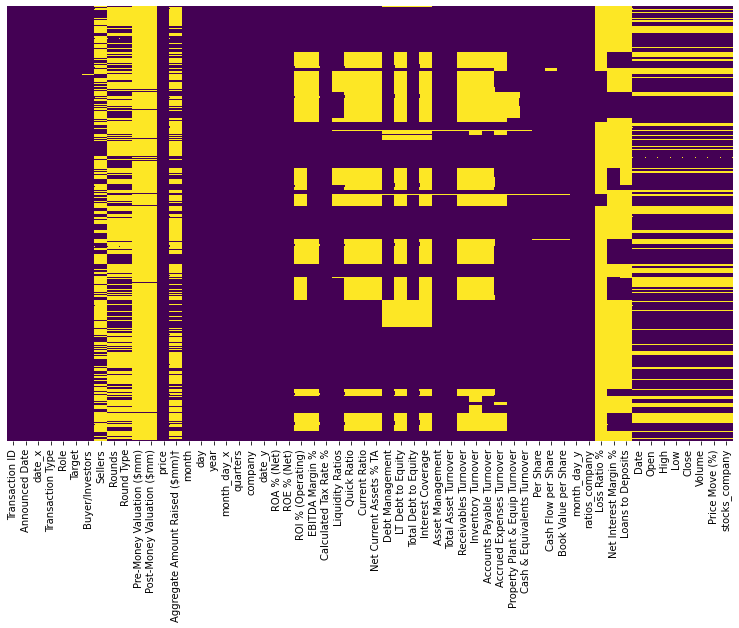

In [32]:
plt.rc('figure', figsize = (13,8))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

Up to this point, we noticed there is an abundance of of missing values. The visual above depicts just how incomplete some attributes are. To further strengthen our argument about a lack of M&A data, we will calculate the percentage of missing values

First we'll replace any '-' with null values

In [33]:
df.replace({'-':np.nan}, inplace = True)

Then, we'll create two dictionaries where if one column is missing 20% or more of its values, it will get assigned to the *Large* dictionary. Else, it will go to *Small*. It is important to note that the 20% is arbitrary. 

In [34]:
large = {}
small = {}

for i in df.columns:
    if (df[i].isnull().sum() / len(df) * 100) >= 20:
        large[i] = df[i].isnull().sum() / len(df) * 100
    elif (df[i].isnull().sum() / len(df) * 100) > 0:
        small[i] = df[i].isnull().sum() / len(df) * 100

In [35]:
large #For example, pre and post money valuation is missing ~95% of its value

{'Sellers': 62.01550387596899,
 'Rounds': 56.74418604651162,
 'Round Type': 56.74418604651162,
 'Pre-Money Valuation ($mm)': 94.96124031007753,
 'Post-Money Valuation ($mm)': 94.88372093023256,
 'Aggregate Amount Raised ($mm)†': 56.74418604651162,
 'ROI % (Operating)': 40.62015503875969,
 'EBITDA Margin %': 40.23255813953489,
 'Quick Ratio': 56.12403100775194,
 'Current Ratio': 40.46511627906977,
 'Net Current Assets % TA': 40.46511627906977,
 'LT Debt to Equity': 55.27131782945737,
 'Interest Coverage': 65.42635658914729,
 'Receivables Turnover': 42.713178294573645,
 'Inventory Turnover': 57.13178294573643,
 'Accounts Payable Turnover': 41.3953488372093,
 'Accrued Expenses Turnover': 47.5968992248062,
 'Loss Ratio %': 87.75193798449612,
 'Net Interest Margin %': 68.68217054263566,
 'Loans to Deposits': 72.32558139534883,
 'Date': 24.651162790697676,
 'Open': 24.651162790697676,
 'High': 24.651162790697676,
 'Low': 24.651162790697676,
 'Close': 24.651162790697676,
 'Volume': 24.6511627

In [36]:
small

{'Buyer/Investors': 0.31007751937984496,
 'ROA % (Net)': 0.31007751937984496,
 'ROE % (Net)': 0.31007751937984496,
 'Calculated Tax Rate %': 0.15503875968992248,
 'Liquidity Ratios': 12.790697674418606,
 'Debt Management': 8.449612403100776,
 'Total Debt to Equity': 12.015503875968992,
 'Asset Management': 0.31007751937984496,
 'Total Asset Turnover': 0.31007751937984496,
 'Property Plant & Equip Turnover': 10.775193798449614,
 'Cash & Equivalents Turnover': 5.426356589147287,
 'Per Share': 0.15503875968992248,
 'Cash Flow per Share': 1.550387596899225,
 'Book Value per Share': 0.23255813953488372}

Anything in the *large* dictionary is too incomplete to use. We will drop those columns. Only exception is the stock information (Open, High, Low, Close, Volume), which is missing 24%. Instead of removing the columns, we will remove the rows and keep the columns to keep as much of the df as possible. In addition, we will only remove rows in the *small* dictionary.

In [37]:
df.shape

(1290, 58)

In [38]:
stock_attributes = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price Move (%)']

In [39]:
# Drop columns in the large dictionary
for i in large.keys():
    if i not in stock_attributes:
        df.drop(i, axis = 1, inplace = True)
        
#Drop rows in the the small dictionary
for i in small.keys():
    df.dropna(subset=[i], inplace = True)
    
#Drop rows for the stock attributes
for i in stock_attributes:
    df.dropna(subset = [i], inplace=True)

In [40]:
df.shape

(596, 36)

<AxesSubplot:>

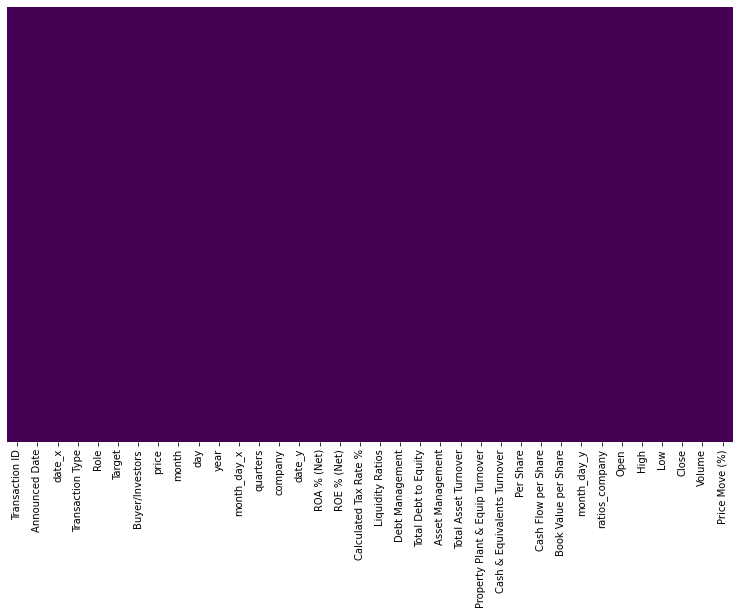

In [41]:
plt.rc('figure', figsize = (13,8))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

<a id="add_clean"></a>
### Additional Data Cleaning

There are duplicate and unnecesay columns that should be removed 

In [42]:
to_delete = ['date_x', 'quarters','month_day_x','Transaction ID', 'Announced Date', 'Role', 'Target', 'Buyer/Investors', 'date_y', 'Liquidity Ratios', 'Debt Management', 'Asset Management', 'Per Share', 'month_day_y', 'ratios_company']

In [43]:
df.drop(to_delete, axis = 1, inplace = True)

There is a fair amount of object data types, some which are suprising (e.g., ROE, Tax Rate, and Total Debt to Equity). A closer look at those columns shows that there are erronous values in the dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 293 to 494
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transaction Type                 596 non-null    object 
 1   price                            596 non-null    float64
 2   month                            596 non-null    object 
 3   day                              596 non-null    object 
 4   year                             596 non-null    object 
 5   company                          596 non-null    object 
 6   ROA % (Net)                      596 non-null    float64
 7   ROE % (Net)                      596 non-null    object 
 8   Calculated Tax Rate %            596 non-null    object 
 9   Total Debt to Equity             596 non-null    object 
 10  Total Asset Turnover             596 non-null    float64
 11  Property Plant & Equip Turnover  596 non-null    float64
 12  Cash & Equivalents T

**Note anomalies**: AvgEqty<0 and Equity<0 as entries in columns "ROE%"" and "Total Debt to Equity"

In [45]:
object_dtypes = []
for col in df.columns:
    if df[col].dtypes == 'O':
        object_dtypes.append(col)
        
df[object_dtypes].head(40) #note AvgEqty<0 and Equity<0 as entries in columns "ROE%"" and "Total Debt to Equity"

,Transaction Type,month,day,year,company,ROE % (Net),Calculated Tax Rate %,Total Debt to Equity
293,Private Placement,01,29,2001,AAPL,4.63,30.65,0.08
292,Merger/Acquisition,04,30,2001,AAPL,6.44,29.89,0.08
291,Merger/Acquisition,07,09,2001,AAPL,6.81,29.79,0.03
290,Private Placement,08,28,2001,AAPL,6.81,29.79,0.03
289,Merger/Acquisition,02,07,2002,AAPL,4.02,27.27,0.37
277,Merger/Acquisition,12,02,2013,AAPL,41.41,26.18,0.13
276,Merger/Acquisition,07,29,2014,AAPL,29.22,26.19,0.32
274,Merger/Acquisition,03,31,2015,AAPL,43.14,26.91,0.34
275,Merger/Acquisition,04,14,2015,AAPL,33.63,26.23,0.43
273,Private Placement,06,13,2016,AAPL,24.33,25.53,0.67


We'll replace those incorrect values and assign numeric values to other attributes

In [46]:
df['ROE % (Net)'].replace({'AvgEqty<0':0}, inplace = True)
df['Calculated Tax Rate %'].replace({'EBT<0':0}, inplace=True)
df['Total Debt to Equity'].replace({'Equity<0':0}, inplace=True)

In [47]:
df['Transaction Type'].replace({'Private Placement':0, 'Merger/Acquisition':1}, inplace = True)

In [48]:
#make the month, day, and year numeric
df[['month', 'day', 'year']] = df[['month', 'day', 'year']].apply(pd.to_numeric)

Finally, we'll conclude by additing industries to the dataframe

In [49]:
tech = ['AAPL', 'AMZN', 'FB', 'GOOGL', 'IBM', 'MSFT', 'ORCL']
retail = ['COST', 'HD', 'KR', 'TGT', 'WMT']
health = ['ABC', 'CVS', 'JNJ', 'MCK', 'PFE', 'UNH']
financial = ['BAC', 'GS', 'JPM', 'MS', 'SCHW', 'WFC']

In [50]:
def industry(x):
    if x in tech:
        return 0
    elif x in retail:
        return 1
    elif x in health:
        return 2
    else:
        return 3

In [51]:
df['industry'] = df.company.apply(industry)
df.drop('company', axis = 1, inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 293 to 494
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transaction Type                 596 non-null    int64  
 1   price                            596 non-null    float64
 2   month                            596 non-null    int64  
 3   day                              596 non-null    int64  
 4   year                             596 non-null    int64  
 5   ROA % (Net)                      596 non-null    float64
 6   ROE % (Net)                      596 non-null    float64
 7   Calculated Tax Rate %            596 non-null    float64
 8   Total Debt to Equity             596 non-null    float64
 9   Total Asset Turnover             596 non-null    float64
 10  Property Plant & Equip Turnover  596 non-null    float64
 11  Cash & Equivalents Turnover      596 non-null    float64
 12  Cash Flow per Share 

In [53]:
#no missing values
df.isnull().sum().sum()

0

[Back to the top](#back_to_top)

---

<a id="analysis"></a>
# Analysis

Sentiment from Wall Street investors could create turmoil for the merging or acquisition process. Although buying and selling stock might not necessarily affect the technical aspects of an acquisition, it might make the transition smoother knowning that the confidence from shareholders remain. For this reason, the short analysis part of this project will focus on building a model that can predict the closing stock price of a company on the date of their acqusition.

Given that this project focused primarily on data gathering and manipulation, we will only focus on building one algorithm. I consider this only the initial step. Now that that there is a useful process for creating a dataframe, the intent is to improve it to fit appropriate and more useful algorithms

<a id="create&train"></a>
## Creating Training and Testing

In [54]:
# sklearn module imports
import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [55]:
#Independent variables
x = df.drop('Close', axis = 1).values

In [56]:
#Dependent variable
y = df['Close'].values

In [57]:
print(x.shape)
print(y.shape)

(596, 20)
(596,)


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [59]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(417, 20) (417,)
(179, 20) (179,)


<a id="selection&scaling"></a>
## Feature Selection and Scaling

#### Feature Selection

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

In [61]:
f = SelectKBest(f_regression, k=10)
x_train = f.fit_transform(x_train, y_train)
x_test = f.transform(x_test)

In [62]:
print(x_train.shape)
print(x_test.shape)

(417, 10)
(179, 10)


In [63]:
cols = f.get_support(indices = True)
cols = df.iloc[:, cols].columns
cols

Index(['Transaction Type', 'year', 'ROA % (Net)', 'Cash Flow per Share',
       'Book Value per Share', 'Open', 'High', 'Low', 'Close',
       'Price Move (%)'],
      dtype='object')

#### Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<a id="regression"></a>
## Multiple Linear Regression

In [66]:
m_reg = sklm.LinearRegression()
m_reg.fit(x_train, y_train)

LinearRegression()

In [67]:
print('Intercept: ', m_reg.intercept_)

Intercept:  205.17189539328538


In [68]:
pd.DataFrame(m_reg.coef_, cols, columns = ['coeff'])

,coeff
Transaction Type,0.203046
year,0.036995
ROA % (Net),0.034302
Cash Flow per Share,-0.065159
Book Value per Share,-0.640006
Open,-226.491478
High,326.193083
Low,292.123184
Close,0.007204
Price Move (%),0.295482


In [69]:
y_pred = m_reg.predict(x_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(50)

,Actual,Predicted
0,1375.180000,1386.783764
1,86.585600,86.644142
2,39.050000,38.764958
3,49.060000,49.133252
4,1190.300000,1191.772908
5,43.000000,43.399058
6,23.990000,24.039743
7,134.350000,134.324718
8,30.395000,29.689297
9,24.040000,24.332667


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4982961600257412
Mean Squared Error (MSE): 12.463044878314268
Root Mean Squared Error: 3.5303037940543116


<a id="stats"></a>
## Statistical Commentary

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
formula = 'Q("Transaction Type") ~ year + Q("ROA % (Net)") + Q("Cash Flow per Share") + Q("Book Value per Share") + Open + High + Low + Close + Volume'

In [73]:
model = smf.ols(formula, data=df) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Transaction Type")   R-squared:                       0.212
Model:                               OLS   Adj. R-squared:                  0.199
Method:                    Least Squares   F-statistic:                     17.47
Date:                   Fri, 20 May 2022   Prob (F-statistic):           9.96e-26
Time:                           16:02:22   Log-Likelihood:                -355.48
No. Observations:                    596   AIC:                             731.0
Df Residuals:                        586   BIC:                             774.9
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    38.1208      6.742      5.654      0.000      24.880      51.362
year                         -0.0187      0.003     -5.564      0.000      -0.025      -0.012
Q("ROA % (Net)")              0.0118      0.003      4.448      0.000       0.007       0.017
Q("Cash Flow per Share")   5.477e-05      0.000      0.154      0.877      -0.001       0.001
Q("Book Value per Share")    -0.0012      0.000     -3.430      0.001      -0.002      -0.001
Open                          0.0059      0.005      1.160      0.246      -0.004       0.016
High                         -0.0064      0.006     -1.007      0.314      -0.019       0.006
Low                          -0.0097      0.006     -1.682      0.093      -0.021       0.002
Close                         0.0100      0.006      1.618      0.106      -0.002       0.022
Volume                    -3.981e-10   3.29e-10     -1.209      0.227   -1.04e-09    2.49e-10
==============================================================================
Omnibus:                      160.386   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.969
Skew:                          -0.479   Prob(JB):                     2.33e-11
Kurtosis:                       1.973   Cond. No.                     2.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some variables appear to be statistically significant. For example, year, ROA, and Book Value per Share.

[Back to the top](#back_to_top)

---

<a id="action"></a>
# Further Action

The primary purpose of this project was on data gathering and cleaning. There are a lot of topics around Mergers and Acquisitions, but my primary goal was to build a dataframe from scratch. I consider this to be only the initial step. Now that that there is a useful process for creating a dataframe, my intent is to improve it to fit appropriate and more useful algorithms.

Desireable actions giong forward would been to do some data visualizations, fine tune the model, or even bin certain variables so that I could use classification models.

Thank you.

[Back to the top](#back_to_top)